In [31]:
from scipy import stats
import numpy as np
import pandas as pd

In [166]:
# suppress scientific notation when printing arrays
np.set_printoptions(formatter={'float': '{: 0.1f}'.format})

# Hypothesis Testing Overview

Our objective in hypothesis testing is to evaluate the default assumption (null hypothesis) about some parameter or distribution. Our alternate hypothesis can just be that the null hypothesis is not true. If we have some intuition about our population/parameter(s), we can make our alternate hypothesis more specific and therefore we can create a more focused one-sided test.

Examples, drawn from Khan Academy:


$H_0 : \mu = some value.$
$H_A : \mu \neq some value.$<br>
Two-sided test

$H_0: \mu = some value.$
$H_A: \mu > some value.$<br>
One-sided test

Then, given some observed data from that population, we calculate how likely it is that we would get a sample at least that extreme (in case of two-sided test) or at least that large/small (in case of one-sided test) **assuming** $H_0$ is true.

We calculate this by choosing an appropriate test statistic depending on the distrbution and then calculating the likelihood of the sample test statistic (p-value).


**Prior** to calculating a test statistic and its p-value, we set a significance level $\alpha$. <br>$\alpha$ represents our threshold for deciding if our sample data is too unlikely for the null hypothesis to be true. Common values are between 1% and 10%, but it varies by industry and use case.

If p < $\alpha$, we conclude that 'There is sufficient evidence to reject $H_0$.'<br>
If p >= $\alpha$, we conclude that 'There is not sufficient evidence to reject $H_0$.'

### Type I and Type II Errors

In [167]:
![type_errors](TypeErrors.png)

zsh:1: unknown file attribute: y


Remember Type **II** error means we failed **to** reject the null hypothesis, i.e. $H_0$ is false but we didn't reject it. Thus, the opposite (Type I) is when we rejected a true $H_0$.

## z-test for binomial distribution (p)

Use Case:
* Evaluate how likely it is that our hypothesized p value describes our population, given a sample with proportion $\hat{p}$.

Example hypotheses:

$H_0: p = 0.75.$<br>
$H_A: p \neq 0.75.$<br>
Two-sided test

$H_0: p = 0.1.$<br>
$H_A: p < 0.1.$<br>
One-sided test

Conditions for inference:
* Random Sample
* Independent Sample: either we sample from the population with replacement or, more likely, we sample <10% of the population (of size N).
$$ n <= \frac{N}{10} $$
* Normal Condition: n must be large enough that we expect to get at least 10 successes and at least 10 failures (where our distribution is defined as P(success) = p for any individual observation). Thus:
$$ np >= 10, n(p-1) >= 10 $$

Meeting the independence condition allows us to estimate the standard deviation of the sample proportion $\hat{p}$ with $$ \sigma_{\hat{p}} = $$

Meeting the normal condition means we can assume that the sampling distribution of $\hat{p]$ is normally distributed and thus it is appropriate to use z-scores to construct a confidence interval or conduct a hypothesis test.

## z-test for normal distribution ($\mu$)

## two-sample z-test

## t-test for normal distribution ($\mu$)

# Chi-Square ${\chi}^2_k$ Tests

Conditions for Inference:
* Random sample
* Large Counts: Expected number of outcomes for each category >= 5
* Independence: either sampling with replacement or n <= N/10 ie the sample size is less than 10% of population size

These are the same for all three variations.

## ${\chi}^2_k$ test for goodness-of-fit

Use Case:
* Evaluate whether a set of categorical data came from a claimed discrete distribution or not. The null hypothesis is that they did and the alternate hypothesis is that they didn't.
* In other words, evaluate how **well** a hypothesized distribution across categories **fits** observed data.

Sample Statistic:
${\chi}^2 = \sum_{i=1}^{k+1} \frac{(obs_i - exp_i)^1}{exp_i}$

We sum over the number of categories (k+1). Degrees of freedom = k.

Calculate cdf using `scipy.stats.chi2.cdf(x, k)` where x is the sample statistic and k is degrees of freedom.

From the ucla.edu link below: "The goodness-of-fit test expands the one-proportion z-test. The one-proportion z-test is used if the outcome has only two categories. The goodness-of-fit test is used if you have two or more categories."

### Worked Example 1

exercise from Khan Academy: https://www.khanacademy.org/math/statistics-probability/inference-categorical-data-chi-square-tests/chi-square-goodness-of-fit-tests/v/chi-square-statistic

$H_0$: answers to multiple choice questions from examiner are uniformly distributed between A,B,C,D

In [20]:
h0_dist = np.asarray([25, 25, 25, 25])
obs = np.asarray([20, 20, 25, 35])

# calculate χ test statistic
# this is (obs - expected (h0_dist))^2 / expected
# if sum(obs) != sum(h0_dist), we would need to calculate expected
sample_chi_sq = np.sum(np.divide(np.square(temp), h0_dist))

In [21]:
# probability of χ^2 >= sample_chi_sq
p = stats.chi2.cdf(sample_chi_sq, 3)

In [22]:
p

0.8883897749052874

In [23]:
# It seems like this is p(χ^2 <= sample_chi_sq)
# We need p(χ^2 >= sample_chi_sq)
# Let's verify how scipy.stats.chi2.cdf() works by plotting some data
# we'll use 3 deg of freedom since that's the distribution in the above exercise
x = range(0,11)
y = stats.chi2.cdf(x, 3)

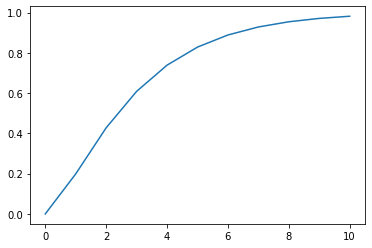

In [28]:
import matplotlib.pyplot as plt
plt.plot(x, y)

In [29]:
# In Khan Academy, we are shown χ^2 tables with significance levels
# instead of confidence intervals. It looks like scipy.stats shows
# χ^2 cdfs in a way consistent with other test statistics.

In [30]:
# Therefore, we need to take 1 - stats.chi2.cdf(χ, 3) to get the significance level
p = 1 - stats.chi2.cdf(χ, 3)

In [31]:
print(p)

0.11161022509471263


In [32]:
# In the exercise, significance level (α) = 0.05.
# p > 0.05, therefore we do not have suffficient evidence to reject H0.

### Worked Example 2

Also from Khan Academy: https://www.khanacademy.org/math/statistics-probability/inference-categorical-data-chi-square-tests/chi-square-goodness-of-fit-tests/v/goodness-of-fit-example

In [39]:
# expected win/loss/tie in rock, paper, scissors
expected = np.asarray([8, 8, 8])

observed = np.asarray([4, 13, 7])

sample_chi_sq = np.sum(np.divide(np.square(observed-expected),expected))

sample_chi_sq

In [42]:
p = 1 - stats.chi2.cdf(sample_chi_sq, 2)

p

### function

Let's turn this into a function which takes expected, observed and returns p-value

In [158]:
## TO DO: add check that expected, observed are 1-dimensional
# else, calculation of k might throw errors
## TO DO: could add a nice print out of values at each step
def chi2_test(expected, observed):
    """ Calculates p-value of chi2 test statistic for expected vs observed
    Args:
        expected (list): list of floats (proportions), hypothesized distribution, must sum to 1
        observed (list): sample frequency table
        
        WARNING: since expected dist must sum to zero, take care with truncated or rounded decimals eg 0.333!
        
    Returns:
        (float): sample chi^2 test statistic
        (float): p-value, likelihood of observing observed data given expected distribution
        returns -1 if expected and observed have different length or if Large Counts condition isn't met
        
    Function depends on numpy and scipy.stats
    """
    
    try:
        expected = np.asarray(expected)
        observed = np.asarray(observed)
    except:
        return -1
    
    # verify that expected and observed have same length ie same num of categories
    if (expected.size != observed.size):
        return -1
    
    # verify that expected dist sums to 1
    if (np.sum(expected) != 1):
        return -1
    
    # calculate sample size
    n = np.sum(observed)
    
    # calculate expected counts
    exp = n * expected
    
    # check Large Counts condition (5+ expected in each cat)
    if (np.any(exp < 5)):
        return -1
    
    # calculate test statistic
    sample_chi2 = np.sum(np.divide(np.square(observed - exp), exp))
    
    # calculate deg of freedom (num of cats - 1)
    k = expected.size - 1
    
    # calculate p-value
    p = 1 - stats.chi2.cdf(sample_chi2, k)
    
    return sample_chi2, p

In [116]:
# let's try the last example once more using this new function
e = np.asarray([1/3, 1/3, 1/3])
o = np.asarray([4, 13, 7])

chi2_test(e, o)

(5.25, 0.07243975703425143)

In [165]:
e = np.asarray([0.6, 0.25, 0.15])
o = np.asarray([33, 8, 4])

chi2_test(e, o)

(3.3925925925925924, 0.18336138421910453)

## $\chi^2_k$ test for homogeneity

Use Case:
* Evaluate how similar **different groups** are.
* Example: Evaluate likelihood of efficacy of interventions relative to control, where $H_0$ is complete inefficacy i.e. completely homogeneous.

If we have a contingency table with independent (or explanatory) variable along one axis and dependent (or response) variable along the other axis,<br>**degrees of freedom** = (number of rows - 1) * (number of columns - 1).

From ucla.edu link below: "The 'test of homogeneity' is a way of determining whether two or more sub-groups of a population share the same distribution of a single categorical variable."

### function

In [150]:
# let's turn this into a function:
def chi2_test_for_homog(observed):
    """ Returns chi^2 statistic and p-value for test of homogeneity between groups
    Args:
        observed (df): contingency table with explanatory variables along columns,
                    response variables along rows with values SET AS INDEX
                    
    Returns:
        float: sample chi^2 statistic
        float: p-value of chi^2 statistic
    """
    
    table = observed.copy()
    
    # add total row and column
    table.loc['total'] = table.sum()
    table.loc[:, 'total'] = table.sum(axis=1)
    
    # extract sample size n
    n = table.loc['total', 'total']
    
    # calculate overall proportion per response
    # slice total column excluding last element (grand total value)
    p = table.iloc[:-1].loc[:, 'total'] / n
    
    # calculate expected table
    expected = np.outer(p, table.loc['total'][:-1])

    # sanity check
    print ('proportion if homogenous')
    print(p)
    print('\nobserved data')
    print(table)
    print('\nexpected data')
    print(expected)
    
    
    # calculate chi2 statistic
    chi2 = np.sum(np.divide(np.square(np.subtract(observed.values, expected)), expected), axis=None)
    
    # calculate degrees of freedom
    # (num of rows - 1) * (num of cols - 1)
    dof = (expected.shape[0] - 1) * (expected.shape[1] - 1)
    
    print('degrees of freedom' + str(dof))
    
    # calculate p-value
    p = 1 - stats.chi2.cdf(chi2, dof)
    
    return chi2, p

In [151]:
# using the function
cols = ['Sport', 'China', 'India']
data = [['Bobsleigh', 8, 10],
        ['Curling', 28, 61],
        ['Hockey', 39, 29],
        ['Speed skating', 75, 50]]
t = pd.DataFrame(data, columns=cols)
t = t.set_index('Sport')


chi2_test_for_homog(t)

proportion if homogenous
Sport
Bobsleigh        0.060000
Curling          0.296667
Hockey           0.226667
Speed skating    0.416667
Name: total, dtype: float64

observed data
               China  India  total
Sport                             
Bobsleigh          8     10     18
Curling           28     61     89
Hockey            39     29     68
Speed skating     75     50    125
total            150    150    300

expected data
[[ 9.0  9.0]
 [ 44.5  44.5]
 [ 34.0  34.0]
 [ 62.5  62.5]]
degrees of freedom3


(18.928765513696113, 0.00028282921547295725)

## $\chi^2_k$ test for association (independence)

Use Case: 
* Evaluate whether two attributes are independent (vs associated) within the **same group**.

In the chi-square test for homogeneity, the distribution along one axis is given. Ie we have the distribution across the groups/the explanatory variable. So, we calculate the percentage of each explanatory variable value given the overall observed distribution of the response variable.

In the test for association, both distributions are drawn from the observed data. So, for each combination of values from the two variables, we are calculating % of whole (n) that are in that combo.

As in the test for homogeneity, **degrees of freedom** = (number of rows - 1) * (number of columns - 1).

From ucla.edu link below: "Now we will have a method for deciding whether our observed P(A|B) is "too far" from our observed P(A) to conclude independence."

### function

In [145]:
# adapt test for homogeneity for association:
def chi2_test_for_assoc(observed):
    """ Returns chi^2 statistic and p-value for test of association between attributes
    Args:
        observed (df): contingency table with explanatory variables along columns,
                    response variables along rows with values SET AS INDEX
                    observed should NOT have totals/subtotals yet!
                    
    Returns:
        float: sample chi^2 statistic
        float: p-value of chi^2 statistic
    """
    
    table = observed.copy()
    
    # add total row and column
    table.loc['total'] = table.sum()
    table.loc[:, 'total'] = table.sum(axis=1)
    
    # extract sample size n
    n = table.loc['total', 'total']
    
    # calculate proportion across columns (x)
    # slice total row excluding last element (grand total n)
    p_x = table.loc['total'].iloc[:-1] / n
    
    # calculate proportion across rows (y)
    # slice total column excluding last element (grand total n)
    p_y = table.iloc[:-1].loc[:, 'total'] / n
    
    # calculate expected table
    # first calculate percentages per (x,y) combo
    # ORDER OF VECTORS IS IMPORTANT
    p = np.outer(p_y, p_x)
    # then multiple by sample size n to get counts
    expected = p * n

    # sanity check
    print('observed data')
    print(table)
    print('\nproportion across columns')
    print(p_x)
    print('\nproportion across rows')
    print(p_y)
    print('\nexpected data')
    print(expected)
    
    
    #chi2 step by step
    temp = np.subtract(observed.values, expected)
    print('\nDifference between observed and expected:')
    print(temp)
    temp = np.square(temp)
    print ('\nDiff squared:')
    print(temp)
    temp = np.divide(temp, expected)
    print('\n Diff sq divided by expected:')
    print(temp)
    temp = np.sum(temp)
    print('\n Sum elements:')
    print(temp)
    
    # calculate chi2 statistic
    chi2 = np.sum(np.divide(np.square(np.subtract(observed.values, expected)), expected), axis=None)
    
    # calculate degrees of freedom
    # (num of rows - 1) * (num of cols - 1)
    dof = (expected.shape[0] - 1) * (expected.shape[1] - 1)
    
    print('degrees of freedom: ' + str(dof))
    
    # calculate p-value
    p = 1 - stats.chi2.cdf(chi2, dof)
    
    return chi2, p

Hang on, this functions the same way as the test for homogeneity... Using the proportion across the x variable to get the counts for each x value is the same as just starting with the counts for the explanatory/independent variable.

So, the difference is just in how we interpret the results? Saying that groups have a homogenenous response to some explanatory variable is the same as saying that the explanatory variable and response variable are independent? In other words, the difference between defining the explanatory var as two groups and defining it as one (umbrella) group with two different values for the same trait is basically semantic.

From ucla.edu:

http://inspire.stat.ucla.edu/unit_13/#:~:text=In%20the%20test%20of%20independence,from%20each%20sub%2Dgroup%20separately.

"In the test of independence, observational units are collected at random from a population and two categorical variables are observed for each unit. In the test of homogeneity, the data are collected by randomly sampling from each sub-group separately."

This link is a fantastic short summary of the chi-square tests.



**So, the difference between the test for homogeneity and association/independence comes down to a difference in sampling. In the test for homogeneity, we can assume the samples of each sub-group will be the same size. Whereas in the test for independence, we sample from one group and observe the distribution across attributes.**

In [124]:
# using our function
cols = ['', 'Ambidextrous', 'Left-handed', 'Right-handed']
data = [['Left foot', 6, 20, 94],
       ['Right foot', 10, 13, 97],
       ['Same length', 20, 33, 307]]
obs = pd.DataFrame(data, columns=cols).set_index('')

In [161]:
chi2_test_for_assoc(obs)

observed data
           0-50  51-100  100+  total
Time                                
Morning     203      77    50    330
Afternoon   117      36    12    165
Evening      45       7     3     55
total       365     120    65    550

proportion across columns
0-50      0.663636
51-100    0.218182
100+      0.118182
Name: total, dtype: float64

proportion across rows
Time
Morning      0.6
Afternoon    0.3
Evening      0.1
Name: total, dtype: float64

expected data
[[ 219.0  72.0  39.0]
 [ 109.5  36.0  19.5]
 [ 36.5  12.0  6.5]]

Difference between observed and expected:
[[-16.0  5.0  11.0]
 [ 7.5  0.0 -7.5]
 [ 8.5 -5.0 -3.5]]

Diff squared:
[[ 256.0  25.0  121.0]
 [ 56.2  0.0  56.2]
 [ 72.2  25.0  12.2]]

 Diff sq divided by expected:
[[ 1.2  0.3  3.1]
 [ 0.5  0.0  2.9]
 [ 2.0  2.1  1.9]]

 Sum elements:
13.964450883971432
degrees of freedom: 4


(13.964450883971432, 0.00740938238529254)

In [160]:
cols = ['Time', '0-50', '51-100', '100+']
data = [['Morning', 203, 77, 50],
        ['Afternoon', 117, 36, 12],
        ['Evening', 45, 7, 3]]
obs = pd.DataFrame(data, columns=cols).set_index('Time')